<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/training/analityk.edu.pl/regu%C5%82y_asocjacyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://analityk.edu.pl/analiza-koszykowa-i-cross-selling-w-python/

# Analiza koszykowa i cross selling w Python

Analiza koszykowa, opiera się o analizę historii zakupów w celu zrozumienia, jakie produktu kupowane są często razem. Tego typu reguły, są stosowane aby rekomendować, obecnym klientom, nabycie dodatkowych produktów i usług, które być może sami by nie kupili, ale podsuwając trafną sugestię, już tak. Poniżej zobaczymy, na czym to dokładnie polega, i jak taką analizę wykonać w Python.
 

Każdy z nas, styka się z tym kilka razy dziennie. Klasyczny przykład, podawany od dawna, to Amazon. W momencie kiedy oglądamy produkty, lub dodamy je do koszyka, przedstawiane / rekomendowane są nam dodatkowe produkty do kupienia.

 

Przykładowo, dodaliśmy do koszyka grzebień do włosów, tak więc może nam się wyświetlić oferta szamponu.

 

Tego typu rekomendacje, nazywa się cross-selling. Czyli do sprzedażą. Cały mechanizm opiera się na analizie wcześniejszych zakupów, a dokładnie, produktów które były kupione razem. Jeżeli występuje częsta sytuacja, że klienci, którzy nabywają grzebienie, kupują również szampony, uzasadnione jest przedstawienie oferty kupna szamponu, dla tego kto ma w koszyku zakupowym grzebień.

 

Takie reguły, nazywa się regułami asocjacyjnymi. Sklepy internetowe, czy też zakupu, to jedno z ich praktycznych zastosowań.

 

Bardzo często, przedstawia się je w taki sposób:

 

X -> Y
 

(chleb) -> (mleko)

 

(gazeta, zeszyt) -> (długopis)

 

Pierwsza reguła, mówi, że jeżeli ktoś chce kupić chleb, to prawdopodobnie kupi też mleko. Druga, że jeżeli ktoś chce kupić gazetę i zeszyt, to prawdopodobnie kupi też długopis.

 

## Reguły asocjacyjne – podstawy

Zanim zaczniemy poszukiwania, naszych reguł asocjacyjnych, na podstawie listy zakupów, musimy poznać kilka podstawowych pojęć z nimi związanych. W szczególności sposób oceny, czy znaleziona przez nas reguła, jest warta uwagi czy też nie.

 

Dla uproszczenia, przyjmijmy, że mówimy o regule:

 

(cukierki) -> (mleko)

 

natomiast nasza historia zakupów wygląda następująco:

In [2]:
import pandas as pd

lista = pd.DataFrame({
        'mleko':[1,0,1,1,1,0,0,0,0,1],
        'chleb':[1,1,0,0,0,1,1,1,1,0],
        'ser':[0,1,0,0,0,0,1,1,1,1],
        'woda':[0,0,1,1,0,1,0,0,0,0],
        'cukierki':[0,0,1,0,0,1,0,0,0,1],
        'jabłka':[1,0,0,0,0,1,1,1,0,1],
        'gazeta':[1,0,1,1,0,0,0,1,1,0]})

lista

,mleko,chleb,ser,woda,cukierki,jabłka,gazeta
0,1,1,0,0,0,1,1
1,0,1,1,0,0,0,0
2,1,0,0,1,1,0,1
3,1,0,0,1,0,0,1
4,1,0,0,0,0,0,0
5,0,1,0,1,1,1,0
6,0,1,1,0,0,1,0
7,0,1,1,0,0,1,1
8,0,1,1,0,0,0,1
9,1,0,1,0,1,1,0


Poszczególne wiersze, odpowiadają paragonowi. Natomiast 0 oraz 1 mówią o tym, czy na tym paragonie został zakupiony chleb, cukierki itd.

 

Tak więc mamy 10 paragonów, czyli historię 10-ciu zakupów.

### support (wsparcie)

support(cukierki,mleko) = (liczba transakcji w której występują razem cukierki i mleko) / (wszystkie transakcje)

 

Jest to miara, która mówi nam, jak często mamy do czynienia z zakupami, których występują cukierki i mleko. Im większa liczba, bym częstsze zjawisko

 

Wartość z zakresu (0,1)

 

W naszym przypadku – support(cukierki->mleko) = 2/10 = 0.2

### confidence (zaufanie)

confidence = support(cukierki,mleko) / support (cukierki)

Krakowiak Paweł taką definicję napisał:

confidence = (liczba transakcji w której występują razem cukierki i mleko) / (liczba transakcji w której występują cukierki)

Miara, która mówi nam, czy kupno mleka, w przypadku kiedy były również kupowane cukierki, było przypadkiem czy nie. czym większa liczba, tym częściej ludzie którzy kupują cukierki, kupują również mleko. Jeżeli mała liczba, to znaczy, że ludzie którzy kupowali cukierki, często nie brali mleka.

 

Wartość z zakresu (0,1)

 

confidence (cukierki, mleko) = 0.2 / 0.3 = 0.66

### lift (przyrost)

lift(cukierki, mleko) = support(cukierki,mleko) / (support(cukierki)*support(mleko))

Krakowiak Paweł tak napisał:

Ważność reguły:

lift(A->B) = conf(A->B) / supp(B)

Da się wyprowadzić stąd powyższ wzór.

Miara, która mówi nam ile razy częściej, cukierki i mleko, występują razem, niż gdyby były statystycznie niezależne.

 
liczba z zakresu od 0 do nieskończoności.

 
Lift = 1 – całkowity brak zależności pomiędzy zakupem cukierków i mleka

 

lift > 1 – pozytywna zależność

 

lift(cukierki, mleko) = 0.2 / (0.3 * 0.5) = 1.33

## Wyznaczanie reguł asocjacyjnych, w Python

Skoro znamy już teorię, czas przejść do praktyki. Jedną z bibliotek w Python, która pomoże nam odnaleźć reguły asocjacyjne, jest mlxtend. Posiada ona zaimplementowaną metodę Apriori. Najbardziej popularną metodę wyznaczana reguł asocjacyjnych.


Instalacja oraz załadowanie bibliotek

 

Na początku musimy zainstalować naszą bibliotekę.

 

$ sudo pip install mlxtend

 

Następnie ładujemy niezbędne biblioteki:


In [3]:
from mlxtend.frequent_patterns import apriori, association_rules

In [4]:
lista

,mleko,chleb,ser,woda,cukierki,jabłka,gazeta
0,1,1,0,0,0,1,1
1,0,1,1,0,0,0,0
2,1,0,0,1,1,0,1
3,1,0,0,1,0,0,1
4,1,0,0,0,0,0,0
5,0,1,0,1,1,1,0
6,0,1,1,0,0,1,0
7,0,1,1,0,0,1,1
8,0,1,1,0,0,0,1
9,1,0,1,0,1,1,0


Sprawdzamy częstotliwość występowania różnych kombinacji

In [5]:
freq_items = apriori(lista, min_support=0.2, use_colnames=True)
freq_items.head(10)

,support,itemsets
0,0.5,(mleko)
1,0.6,(chleb)
2,0.5,(ser)
3,0.3,(woda)
4,0.3,(cukierki)
5,0.5,(jabłka)
6,0.5,(gazeta)
7,0.2,"(mleko, woda)"
8,0.2,"(mleko, cukierki)"
9,0.2,"(mleko, jabłka)"


sprawdzamy reguły asocjacyjne, których mamy zaufanie większe niż 65%

In [6]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.65)
rules.head()
# ważne koluny to 'antecedents', 'consequents', 'support', 'confidence', 'lift'

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(woda),(mleko),0.3,0.5,0.2,0.666667,1.333333,0.05,1.5
1,(cukierki),(mleko),0.3,0.5,0.2,0.666667,1.333333,0.05,1.5
2,(ser),(chleb),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
3,(chleb),(ser),0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
4,(jabłka),(chleb),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


Tak jak widzimy, pierwszy rekord, jest to reguła, którą wyliczyliśmy wcześniej 'ręcznie', z wartościami support, confidence oraz lift, równymi wartościom których się spodziewaliśmy.

In [7]:
# wybieram ważne kolumny tak jak Paweł Krakowiak
rules = rules.iloc[:, [0,1,4,5,6]]
rules

,antecedents,consequents,support,confidence,lift
0,(woda),(mleko),0.2,0.666667,1.333333
1,(cukierki),(mleko),0.2,0.666667,1.333333
2,(ser),(chleb),0.4,0.800000,1.333333
3,(chleb),(ser),0.4,0.666667,1.333333
4,(jabłka),(chleb),0.4,0.800000,1.333333
5,(chleb),(jabłka),0.4,0.666667,1.333333
6,(woda),(cukierki),0.2,0.666667,2.222222
7,(cukierki),(woda),0.2,0.666667,2.222222
8,(woda),(gazeta),0.2,0.666667,1.333333
9,(cukierki),(jabłka),0.2,0.666667,1.333333


wybieramy reguły asocjacyjne

 

W rzeczywistości często wybieramy reguły, do których mamy duże przekonanie. Czyli preferujemy confidence, a nie support.

In [8]:
rules.sort_values(by='confidence', ascending=False).head()

,antecedents,consequents,support,confidence,lift
17,"(jabłka, gazeta)",(chleb),0.2,1.0,1.666667
15,"(ser, gazeta)",(chleb),0.2,1.0,1.666667
12,"(woda, gazeta)",(mleko),0.2,1.0,2.000000
10,"(mleko, woda)",(gazeta),0.2,1.0,2.000000
2,(ser),(chleb),0.4,0.8,1.333333


Możemy pokusić się jeszcze o szybko wizualizację znalezionych reguł pod kątem confidence oraz lift

         antecedents      consequents  ...      lift                   rule
0             (woda)          (mleko)  ...  1.333333            woda->mleko
1         (cukierki)          (mleko)  ...  1.333333        cukierki->mleko
2              (ser)          (chleb)  ...  1.333333             ser->chleb
3            (chleb)            (ser)  ...  1.333333             chleb->ser
4           (jabłka)          (chleb)  ...  1.333333          jabłka->chleb
5            (chleb)         (jabłka)  ...  1.333333          chleb->jabłka
6             (woda)       (cukierki)  ...  2.222222         woda->cukierki
7         (cukierki)           (woda)  ...  2.222222         cukierki->woda
8             (woda)         (gazeta)  ...  1.333333           woda->gazeta
9         (cukierki)         (jabłka)  ...  1.333333       cukierki->jabłka
10     (mleko, woda)         (gazeta)  ...  2.000000    mleko, woda->gazeta
11   (mleko, gazeta)           (woda)  ...  2.222222    mleko, gazeta->woda
12    (woda,

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


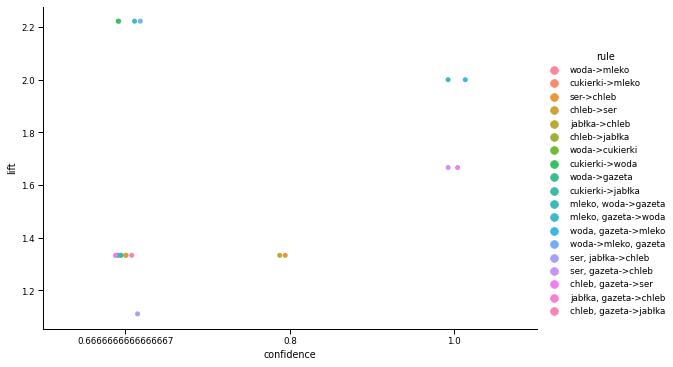

In [24]:
# tworzy kolumnę 'rule', która przechowuje zasady
rules["rule"] = rules["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode") + \
        '->' + rules["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

print(rules)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper')
sns.catplot(data=rules,
           x = "confidence",
           y = "lift",
           ax = ax,
           aspect = 1.5,
           hue = "rule")

plt.show()